#### - Reverse the whole data set (the last row will be the first one) 
- Apply sliding window technique  and store the patches in a 2D list
- Find if there is a correlation between the price of the apps and the category (Teen, Everyone, Mature). What is the best method to do this?
- Find the sentiment of all apps using VADER . What is the best category according to sentiment values?

In [38]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
import scipy.stats as ss
from scipy.stats import chi2_contingency
import seaborn as sns
import plotly.express as px

### - Reverse the whole data set 

In [39]:
df = pd.read_csv('googleplaystore.csv')

In [40]:
df.iloc[:,::-1].head(3)

,Android Ver,Current Ver,Last Updated,Genres,Content Rating,Price,Type,Installs,Size,Reviews,Rating,Category,App
0,4.0.3 and up,1.0.0,"January 7, 2018",Art & Design,Everyone,0,Free,"10,000+",19M,159,4.1,ART_AND_DESIGN,Photo Editor & Candy Camera & Grid & ScrapBook
1,4.0.3 and up,2.0.0,"January 15, 2018",Art & Design;Pretend Play,Everyone,0,Free,"500,000+",14M,967,3.9,ART_AND_DESIGN,Coloring book moana
2,4.0.3 and up,1.2.4,"August 1, 2018",Art & Design,Everyone,0,Free,"5,000,000+",8.7M,87510,4.7,ART_AND_DESIGN,"U Launcher Lite – FREE Live Cool Themes, Hide ..."


### Find if there is a correlation between the price of the apps and the category (Teen, Everyone, Mature). What is the best method to do this?

In [41]:
df['Price'].unique()
df = df[df['Price'] != 'Everyone']

In [44]:
df['Price']=df['Price'].apply(lambda x: x.replace('$',''))
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10840, dtype: object

In [45]:
df['Price']=df['Price'].astype(float)

In [46]:
df['Content Rating'].unique()
df = df[df['Content Rating'] != 'Unrated']   #3 #2
df = df[df['Content Rating'] != 'Adults only 18+']
df = df[df['Content Rating'] != 'Everyone 10+']

In [10]:
df_ = pd.concat([df['Price'], pd.get_dummies(df['Content Rating'])], axis=1)
df_corr = df_.corr()

<AxesSubplot:>

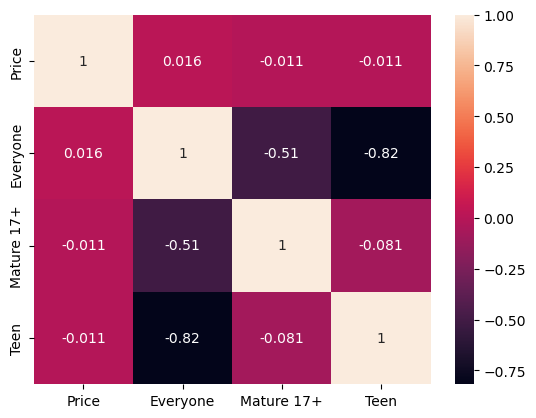

In [11]:
sns.heatmap(df_corr, annot=True)

### Apply sliding window technique and store the patches in a 2d list


In [12]:
def sliding_window(elements, window_size):
    
    if len(elements) <= window_size:
       return elements
    for i in range(len(elements)):
        print(elements[i:i+window_size], sep=",")

In [15]:
sliding_window(df['App'].head(100),20)

0        Photo Editor & Candy Camera & Grid & ScrapBook
1                                   Coloring book moana
2     U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                 Sketch - Draw & Paint
4                 Pixel Draw - Number Art Coloring Book
5                            Paper flowers instructions
6               Smoke Effect Photo Maker - Smoke Editor
7                                      Infinite Painter
8                                  Garden Coloring Book
9                         Kids Paint Free - Drawing Fun
10                              Text on Photo - Fonteee
11              Name Art Photo Editor - Focus n Filters
12                       Tattoo Name On My Photo Editor
13                                Mandala Coloring Book
14      3D Color Pixel by Number - Sandbox Art Coloring
15                      Learn To Draw Kawaii Characters
16         Photo Designer - Write your name with shapes
17                             350 Diy Room Deco

### Find the sentiment of all apps using VADER . 

In [16]:
df_review = pd.read_csv('googleplaystore_user_reviews.csv')

In [17]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [18]:
df_review.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [19]:
df_review = df_review.dropna()

In [20]:
df_review.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [21]:
df_review.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [ ]:
object_col =df_review.dtypes[df_review.dtypes ==  'object'].index
df_review[object_col].describe()

In [ ]:
df_review['Translated_Review'].head()

In [25]:
import sys 
import ast
import re

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [26]:
# Generating sentiment for all the sentence in the dataset
emptyline = []
for row in df_review['Translated_Review']:
    vs = analyzer.polarity_scores(row)
    emptyline.append(vs)
#creating new df with sentiment
df_sentiments= pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.0,0.482,0.518,0.9531
1,0.0,0.481,0.519,0.6597
2,0.0,0.549,0.451,0.6249
3,0.0,0.323,0.677,0.6369
4,0.0,0.192,0.808,0.6369


In [27]:
# Merging the sentiment back to the reviews df
df_review = pd.concat([df_review.reset_index(drop=True), df_sentiments], axis=1)
df_review.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,neg,neu,pos,compound
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.0,0.482,0.518,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.0,0.481,0.519,0.6597
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.0,0.549,0.451,0.6249


In [28]:
df_app = df[['App','Category']]

In [29]:
data = df_review.merge(df_app, on='App', how='left')
data = data.dropna()
data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,neg,neu,pos,compound,Category
234,11st,Horrible ID verification,Negative,-1.000000,1.000000,0.636,0.364,0.000,-0.5423,SHOPPING
235,11st,Easy even basic Korean. Searching English usua...,Positive,0.236667,0.301667,0.000,0.647,0.353,0.7964,SHOPPING
236,11st,Cool,Positive,0.350000,0.650000,0.000,0.000,1.000,0.3182,SHOPPING
237,11st,"I do not collect it for a month, but I will no...",Neutral,0.000000,1.000000,0.000,1.000,0.000,0.0000,SHOPPING
238,11st,Top bar missing newest update. Hard shop can't...,Positive,0.002778,0.363889,0.316,0.526,0.158,-0.2023,SHOPPING
...,...,...,...,...,...,...,...,...,...,...
72499,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,0.209,0.791,0.000,-0.6486,LIFESTYLE
72500,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,0.041,0.733,0.226,0.7430,LIFESTYLE
72501,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,0.319,0.681,0.000,-0.7269,LIFESTYLE
72502,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,0.000,0.657,0.343,0.7783,LIFESTYLE


In [31]:
data.groupby('Category').sum().sort_values('pos',ascending=False)

,Sentiment_Polarity,Sentiment_Subjectivity,neg,neu,pos,compound
Category,,,,,,
GAME,1101.383052,9103.768739,2193.589,10798.496,5191.982,7047.3744
FAMILY,781.491180,2830.943029,483.417,3191.042,1899.542,2491.0645
HEALTH_AND_FITNESS,1073.171705,2086.114623,316.338,2571.108,1227.493,1917.4561
DATING,527.083671,1630.127570,350.011,1805.991,1041.923,771.5012
SPORTS,592.153545,1722.840518,333.026,2226.569,908.281,1016.7215
TRAVEL_AND_LOCAL,522.122238,1525.925524,286.591,1978.754,835.670,790.2253
BUSINESS,581.467643,1045.577364,125.740,1406.407,814.869,771.5845
PHOTOGRAPHY,546.295421,1246.028755,197.372,1504.763,777.813,925.0565
PRODUCTIVITY,528.647915,1485.604469,269.983,2119.003,732.133,1107.8448


In [35]:
#px.bar(data,'Category',['pos','neg'],title='sentiment reviews by category'.title())
